In [286]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
df=pd.read_csv("/content/drive/MyDrive/python/Dataset/waterQuality1.csv")
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [288]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [289]:
new_df=df.drop(['arsenic','ammonia','barium','cadmium','chromium','perchlorate','silver','uranium','radium','selenium','nitrates','nitrites','flouride'],axis='columns')
new_df

,aluminium,chloramine,copper,bacteria,viruses,lead,mercury,is_safe
0,1.65,0.35,0.17,0.20,0.000,0.054,0.007,1
1,2.32,5.28,0.66,0.65,0.650,0.100,0.003,1
2,1.01,4.24,0.02,0.05,0.003,0.078,0.006,0
3,1.36,7.23,1.66,0.71,0.710,0.016,0.004,1
4,0.92,2.67,0.57,0.13,0.001,0.117,0.003,1
...,...,...,...,...,...,...,...,...
7994,0.05,0.10,0.03,0.00,0.000,0.197,0.005,1
7995,0.05,0.45,0.02,0.00,0.000,0.031,0.001,1
7996,0.09,0.05,0.02,0.00,0.000,0.182,0.000,1
7997,0.01,2.00,0.09,0.00,0.000,0.000,0.000,1


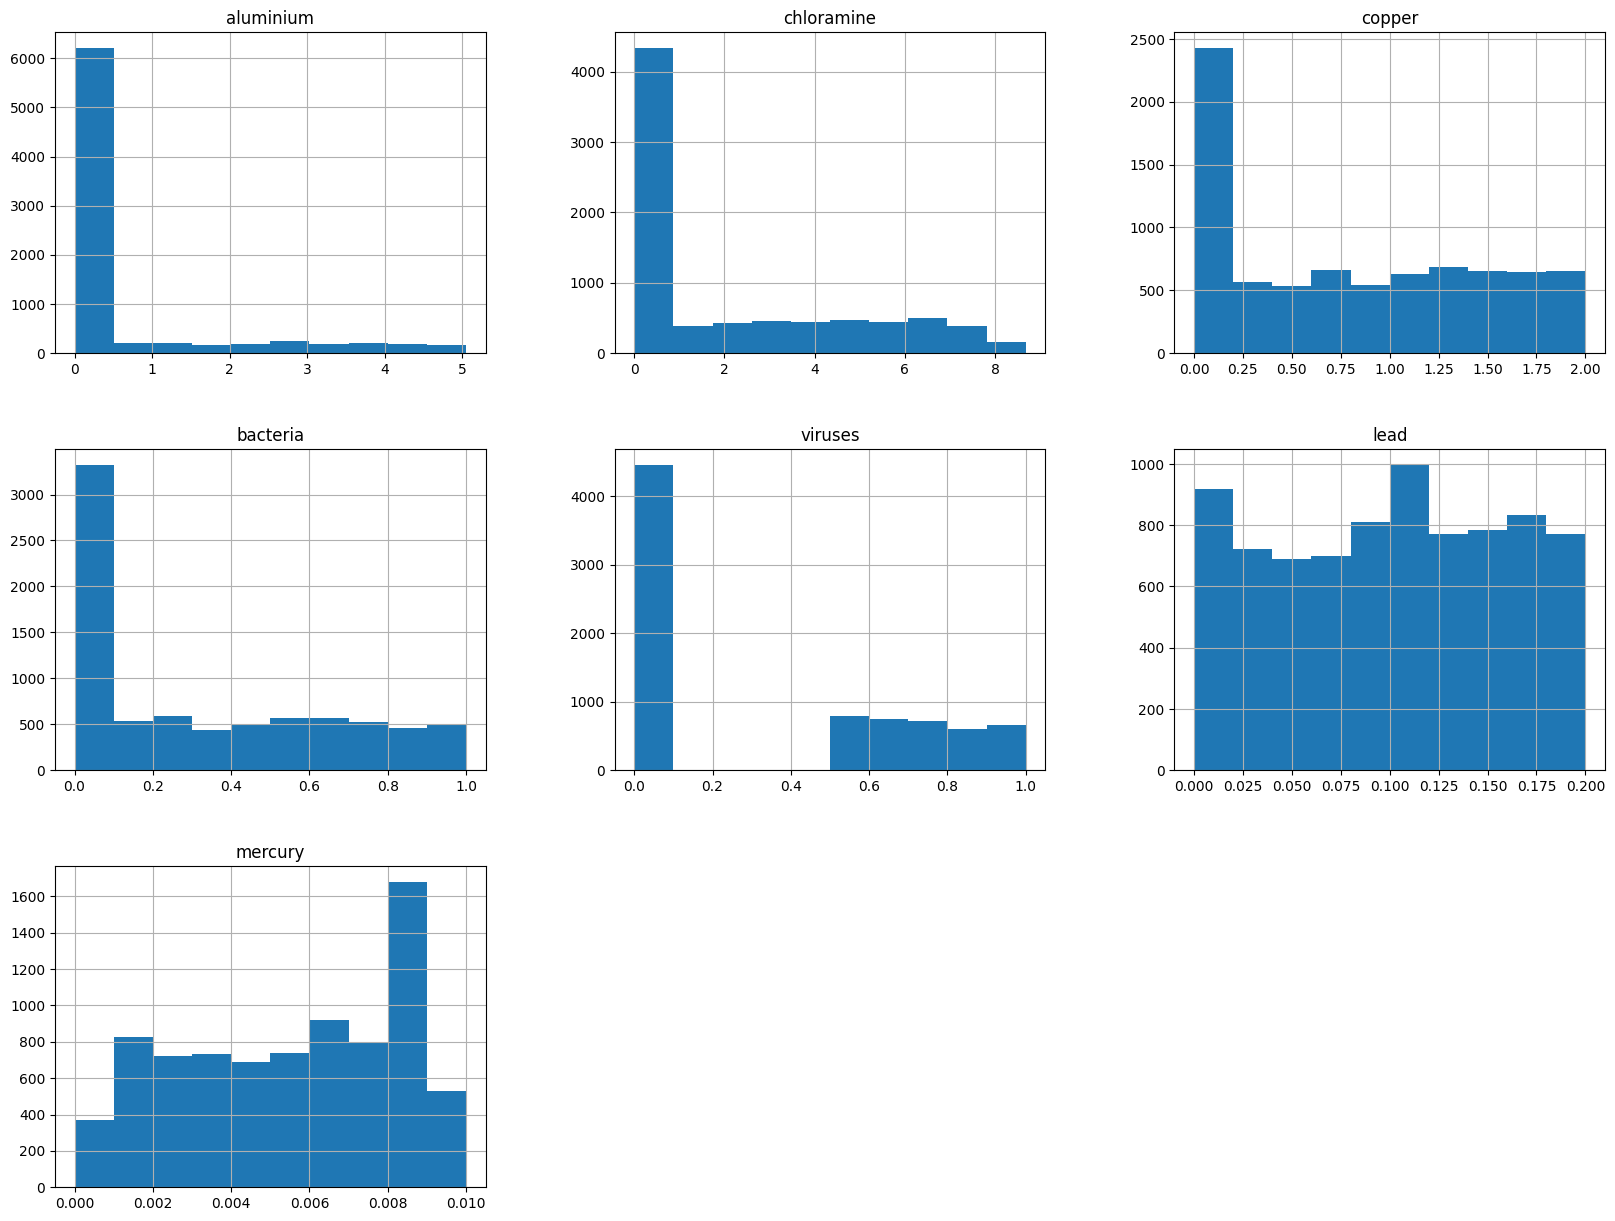

In [290]:
dgraph=new_df.select_dtypes(include=['float'])
dgraph.hist(figsize=(20,15))
plt.show()

In [291]:
new_df.columns

Index(['aluminium', 'chloramine', 'copper', 'bacteria', 'viruses', 'lead',
       'mercury', 'is_safe'],
      dtype='object')

Text(0.5, 1.0, 'Box plot of aluminium')

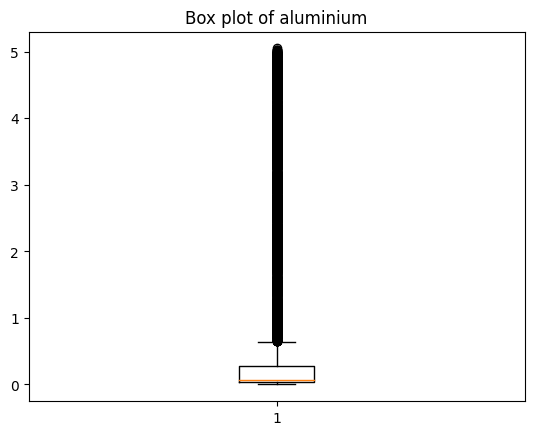

In [292]:
plt.boxplot(new_df['aluminium'])
plt.title("Box plot of aluminium")

In [293]:
q1=np.percentile(new_df['aluminium'],25,interpolation='midpoint')
q2=np.percentile(new_df['aluminium'],50,interpolation='midpoint')
q3=np.percentile(new_df['aluminium'],75,interpolation='midpoint')

print(q1)
print(q2)
print(q3)
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr

print("low limit",low_limit)
print("up limit",up_limit)

0.04
0.07
0.28
low limit -0.32000000000000006
up limit 0.6400000000000001


<ipython-input-293-fc557369eddd>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(new_df['aluminium'],25,interpolation='midpoint')
<ipython-input-293-fc557369eddd>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(new_df['aluminium'],50,interpolation='midpoint')
<ipython-input-293-fc557369eddd>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.p

In [294]:
outlier=[]
for x in new_df['aluminium']:
  if((x>up_limit)or (x<low_limit)):
    outlier.append(x)

outlier

[1.65,
 2.32,
 1.01,
 1.36,
 0.92,
 0.94,
 2.36,
 3.93,
 3.27,
 1.35,
 1.88,
 4.93,
 2.89,
 3.47,
 2.11,
 4.88,
 4.12,
 0.68,
 1.15,
 4.32,
 2.36,
 3.31,
 1.82,
 3.42,
 4.41,
 4.57,
 1.69,
 1.87,
 2.71,
 1.63,
 4.49,
 3.52,
 4.35,
 2.51,
 2.34,
 1.71,
 3.45,
 3.37,
 3.13,
 1.51,
 1.09,
 0.94,
 2.68,
 2.55,
 0.86,
 4.32,
 3.63,
 3.26,
 0.77,
 3.82,
 2.78,
 3.62,
 3.88,
 4.64,
 2.25,
 4.62,
 2.5,
 3.08,
 3.03,
 2.85,
 1.38,
 2.73,
 3.02,
 1.96,
 2.35,
 2.45,
 2.67,
 1.12,
 3.3,
 1.19,
 0.85,
 4.64,
 4.75,
 1.89,
 3.75,
 3.32,
 1.75,
 0.94,
 2.66,
 2.76,
 2.63,
 2.85,
 0.88,
 3.03,
 2.22,
 4.91,
 1.15,
 4.8,
 1.62,
 2.68,
 4.66,
 2.74,
 1.79,
 2.5,
 3.52,
 4.15,
 3.78,
 1.82,
 2.91,
 4.3,
 3.24,
 3.53,
 3.04,
 2.21,
 2.47,
 1.92,
 1.22,
 2.12,
 4.19,
 4.21,
 4.07,
 2.56,
 3.55,
 3.94,
 1.22,
 0.8,
 3.31,
 2.59,
 3.9,
 3.15,
 3.86,
 1.25,
 2.29,
 2.71,
 4.18,
 4.34,
 0.92,
 2.39,
 0.9,
 0.89,
 2.4,
 4.91,
 3.37,
 3.08,
 3.69,
 4.71,
 3.36,
 4.46,
 4.5,
 2.69,
 4.3,
 2.17,
 1.32,
 2.59,
 5.

In [295]:
ind1=new_df['aluminium']>up_limit
x=new_df.loc[ind1].index
x

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,   10,   11,
            ...
            1988, 1989, 1990, 1992, 1993, 1994, 1995, 1996, 1997, 1998],
           dtype='int64', length=1731)

In [296]:
for i in x:
  new_df.drop(i,inplace=True)

In [297]:
ind1=new_df['aluminium']<low_limit
x=new_df.loc[ind1].index
x

Int64Index([], dtype='int64')

Text(0.5, 1.0, 'Box plot of aluminium')

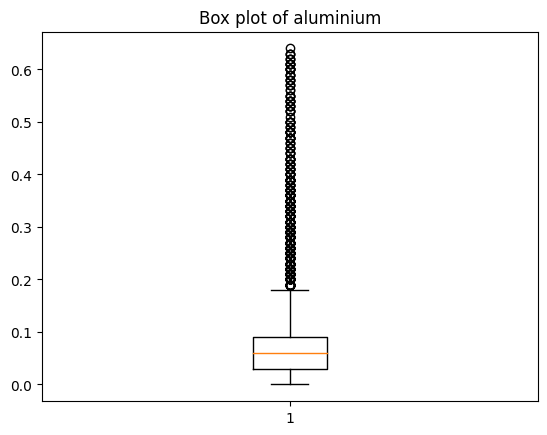

In [298]:
plt.boxplot(new_df['aluminium'])
plt.title("Box plot of aluminium")

Text(0.5, 1.0, 'Box plot of chloramine')

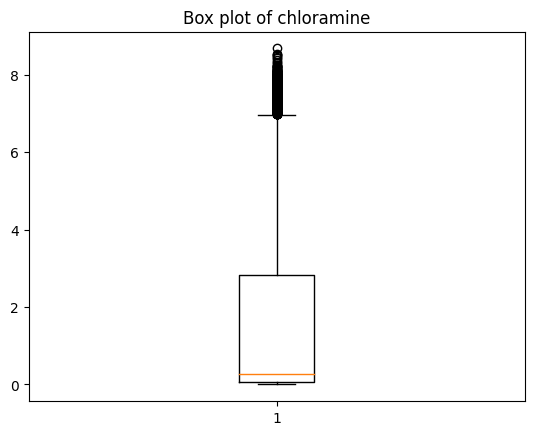

In [299]:
plt.boxplot(new_df['chloramine'])
plt.title("Box plot of chloramine")

In [300]:
q1=np.percentile(new_df['chloramine'],25,interpolation='midpoint')
q2=np.percentile(new_df['chloramine'],50,interpolation='midpoint')
q3=np.percentile(new_df['chloramine'],75,interpolation='midpoint')

print(q1)
print(q2)
print(q3)
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr

print("low limit",low_limit)
print("up limit",up_limit)

0.07
0.28
2.83
low limit -4.07
up limit 6.970000000000001


<ipython-input-300-cb898c371d29>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(new_df['chloramine'],25,interpolation='midpoint')
<ipython-input-300-cb898c371d29>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(new_df['chloramine'],50,interpolation='midpoint')
<ipython-input-300-cb898c371d29>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np

In [301]:
outlier=[]
for x in new_df['chloramine']:
  if((x>up_limit)or (x<low_limit)):
    outlier.append(x)

outlier

[7.75,
 7.36,
 7.41,
 7.33,
 7.02,
 7.07,
 7.43,
 7.12,
 7.44,
 7.34,
 7.25,
 7.0,
 7.59,
 6.99,
 7.22,
 7.12,
 7.22,
 7.86,
 7.05,
 7.24,
 7.49,
 7.37,
 7.18,
 7.67,
 7.06,
 8.31,
 7.45,
 7.55,
 7.24,
 7.26,
 7.89,
 7.54,
 7.49,
 7.73,
 7.44,
 7.83,
 7.73,
 7.31,
 7.29,
 7.69,
 7.22,
 7.66,
 7.27,
 7.07,
 7.74,
 7.42,
 7.36,
 7.99,
 7.3,
 7.12,
 7.23,
 7.78,
 7.24,
 7.22,
 7.75,
 7.7,
 7.97,
 7.06,
 7.81,
 7.56,
 7.52,
 7.37,
 7.36,
 7.97,
 7.09,
 7.8,
 7.59,
 7.95,
 7.12,
 7.91,
 7.47,
 7.51,
 7.88,
 7.14,
 7.41,
 7.24,
 7.33,
 7.02,
 7.96,
 7.07,
 7.16,
 6.99,
 7.75,
 7.17,
 7.55,
 7.83,
 7.43,
 7.58,
 7.99,
 7.89,
 7.18,
 7.12,
 7.65,
 6.98,
 7.18,
 7.0,
 7.51,
 7.44,
 7.38,
 7.82,
 7.93,
 7.24,
 7.85,
 7.34,
 7.25,
 7.97,
 7.17,
 7.83,
 7.35,
 7.0,
 7.96,
 7.78,
 7.57,
 7.79,
 7.59,
 7.3,
 7.02,
 7.97,
 7.21,
 6.99,
 7.17,
 7.87,
 7.21,
 7.22,
 7.49,
 7.43,
 7.81,
 7.24,
 7.81,
 7.85,
 7.31,
 7.99,
 7.12,
 7.12,
 7.78,
 7.48,
 7.86,
 7.22,
 7.08,
 7.54,
 7.86,
 7.52,
 7.89,
 7.05,

In [302]:
ind1=new_df['chloramine']>up_limit
x=new_df.loc[ind1].index
x

Int64Index([  34,  105,  220,  225,  252,  254,  297,  340,  369,  409,
            ...
            3914, 3919, 3936, 3946, 3947, 3958, 3964, 3965, 3974, 3989],
           dtype='int64', length=314)

In [303]:
for i in x:
  new_df.drop(i,inplace=True)

In [304]:
ind1=new_df['chloramine']<low_limit
x=new_df.loc[ind1].index
x

Int64Index([], dtype='int64')

Text(0.5, 1.0, 'Box plot of chloramine')

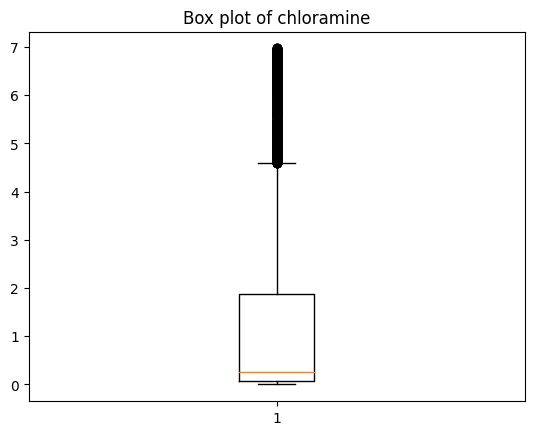

In [305]:
plt.boxplot(new_df['chloramine'])
plt.title("Box plot of chloramine")

Text(0.5, 1.0, 'Box plot of copper')

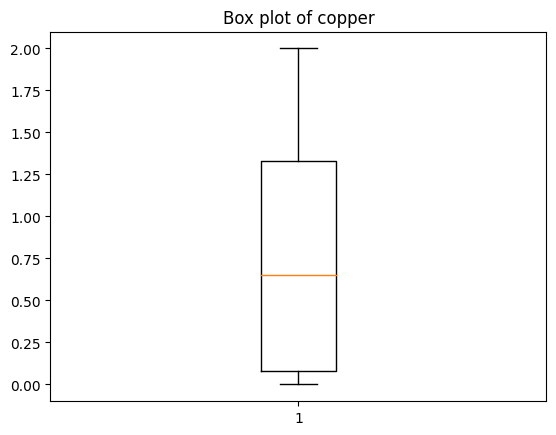

In [306]:
plt.boxplot(new_df['copper'])
plt.title("Box plot of copper")

In [307]:
q1=np.percentile(new_df['copper'],25,interpolation='midpoint')
q2=np.percentile(new_df['copper'],50,interpolation='midpoint')
q3=np.percentile(new_df['copper'],75,interpolation='midpoint')

print(q1)
print(q2)
print(q3)
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr

print("low limit",low_limit)
print("up limit",up_limit)

0.08
0.65
1.33
low limit -1.795
up limit 3.205


<ipython-input-307-97bebb129404>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(new_df['copper'],25,interpolation='midpoint')
<ipython-input-307-97bebb129404>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(new_df['copper'],50,interpolation='midpoint')
<ipython-input-307-97bebb129404>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.percent

In [308]:
outlier=[]
for x in new_df['copper']:
  if((x>up_limit)or (x<low_limit)):
    outlier.append(x)

outlier

[]

Text(0.5, 1.0, 'Box plot of bacteria')

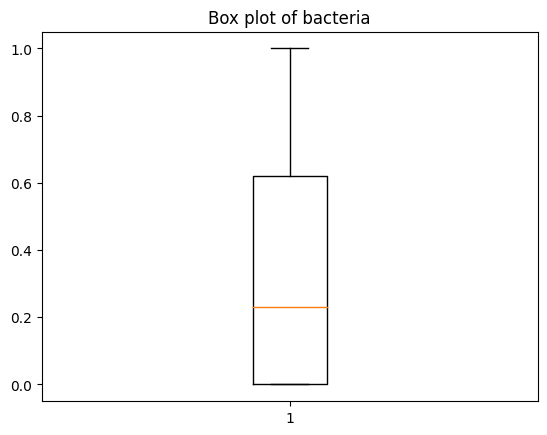

In [309]:
plt.boxplot(new_df['bacteria'])
plt.title("Box plot of bacteria")

In [310]:
q1=np.percentile(new_df['bacteria'],25,interpolation='midpoint')
q2=np.percentile(new_df['bacteria'],50,interpolation='midpoint')
q3=np.percentile(new_df['bacteria'],75,interpolation='midpoint')

print(q1)
print(q2)
print(q3)
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr

print("low limit",low_limit)
print("up limit",up_limit)

<ipython-input-310-889caf920320>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(new_df['bacteria'],25,interpolation='midpoint')
<ipython-input-310-889caf920320>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(new_df['bacteria'],50,interpolation='midpoint')


0.0
0.23
0.62
low limit -0.9299999999999999
up limit 1.5499999999999998


<ipython-input-310-889caf920320>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.percentile(new_df['bacteria'],75,interpolation='midpoint')


In [311]:
outlier=[]
for x in new_df['bacteria']:
  if((x>up_limit)or (x<low_limit)):
    outlier.append(x)

outlier

[]

Text(0.5, 1.0, 'Box plot of viruses')

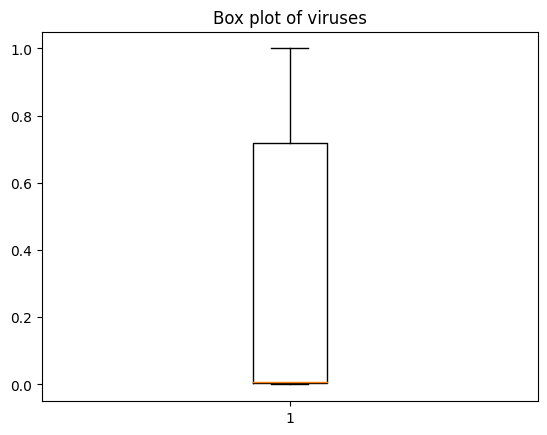

In [312]:
plt.boxplot(new_df['viruses'])
plt.title("Box plot of viruses")

In [313]:
q1=np.percentile(new_df['viruses'],25,interpolation='midpoint')
q2=np.percentile(new_df['viruses'],50,interpolation='midpoint')
q3=np.percentile(new_df['viruses'],75,interpolation='midpoint')

print(q1)
print(q2)
print(q3)
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr

print("low limit",low_limit)
print("up limit",up_limit)

0.003
0.008
0.72
low limit -1.0725
up limit 1.7954999999999999


<ipython-input-313-74dbcb1ec9fe>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(new_df['viruses'],25,interpolation='midpoint')
<ipython-input-313-74dbcb1ec9fe>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(new_df['viruses'],50,interpolation='midpoint')
<ipython-input-313-74dbcb1ec9fe>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.perce

In [314]:
outlier=[]
for x in new_df['viruses']:
  if((x>up_limit)or (x<low_limit)):
    outlier.append(x)

outlier

[]

Text(0.5, 1.0, 'Box plot of viruses')

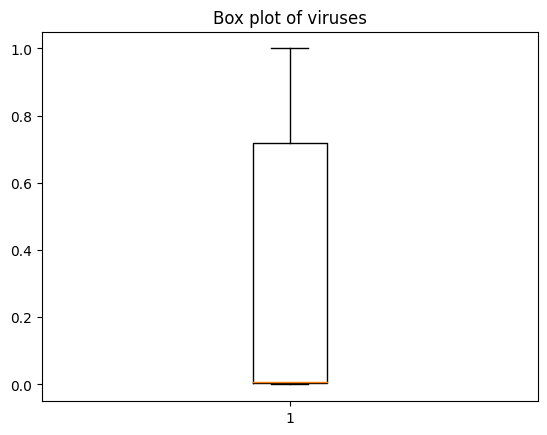

In [315]:
plt.boxplot(new_df['viruses'])
plt.title("Box plot of viruses")

In [316]:
new_df.columns

Index(['aluminium', 'chloramine', 'copper', 'bacteria', 'viruses', 'lead',
       'mercury', 'is_safe'],
      dtype='object')

Text(0.5, 1.0, 'Box plot of lead')

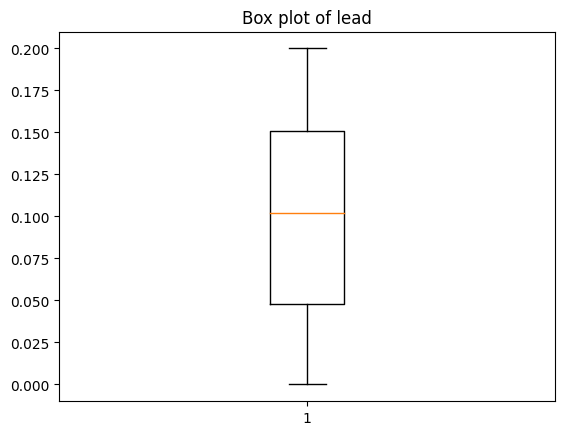

In [317]:
plt.boxplot(new_df['lead'])
plt.title("Box plot of lead")

In [318]:
q1=np.percentile(new_df['lead'],25,interpolation='midpoint')
q2=np.percentile(new_df['lead'],50,interpolation='midpoint')
q3=np.percentile(new_df['lead'],75,interpolation='midpoint')

print(q1)
print(q2)
print(q3)
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr

print("low limit",low_limit)
print("up limit",up_limit)

0.048
0.102
0.151
low limit -0.1065
up limit 0.3055


<ipython-input-318-02126dccfa4a>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(new_df['lead'],25,interpolation='midpoint')
<ipython-input-318-02126dccfa4a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(new_df['lead'],50,interpolation='midpoint')
<ipython-input-318-02126dccfa4a>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.percentile(

In [319]:
outlier=[]
for x in new_df['lead']:
  if((x>up_limit)or (x<low_limit)):
    outlier.append(x)

outlier

[]

Text(0.5, 1.0, 'Box plot of mercury')

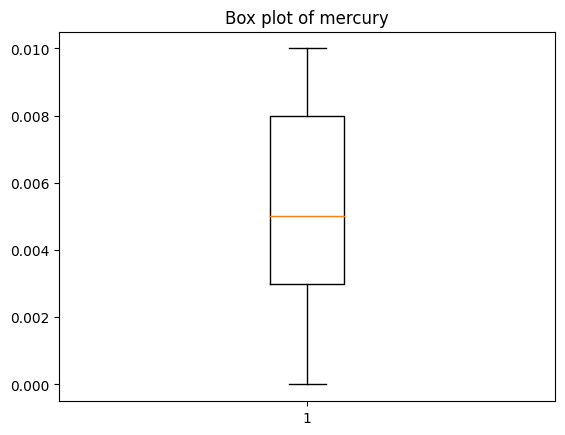

In [320]:
plt.boxplot(new_df['mercury'])
plt.title("Box plot of mercury")

In [321]:
q1=np.percentile(new_df['mercury'],25,interpolation='midpoint')
q2=np.percentile(new_df['mercury'],50,interpolation='midpoint')
q3=np.percentile(new_df['mercury'],75,interpolation='midpoint')

print(q1)
print(q2)
print(q3)
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr

print("low limit",low_limit)
print("up limit",up_limit)

0.003
0.005
0.008
low limit -0.0045
up limit 0.0155


<ipython-input-321-5237fca19a21>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(new_df['mercury'],25,interpolation='midpoint')
<ipython-input-321-5237fca19a21>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(new_df['mercury'],50,interpolation='midpoint')
<ipython-input-321-5237fca19a21>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.perce

In [322]:
outlier=[]
for x in new_df['mercury']:
  if((x>up_limit)or (x<low_limit)):
    outlier.append(x)

outlier

[]

In [323]:
############

In [324]:
x=new_df.drop(['is_safe'],axis='columns')
y=new_df['is_safe']

In [325]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [326]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [327]:
x_test

,aluminium,chloramine,copper,bacteria,viruses,lead,mercury
6599,0.09,0.09,1.39,0.94,0.940,0.116,0.006
4381,0.05,0.05,0.04,0.00,0.850,0.100,0.005
3282,0.07,3.80,1.86,0.15,0.003,0.115,0.005
2554,0.29,2.16,1.76,0.32,0.002,0.048,0.004
5746,0.08,0.35,1.76,0.50,0.500,0.096,0.002
...,...,...,...,...,...,...,...
7233,0.00,0.42,1.46,0.26,0.002,0.135,0.005
5127,0.09,0.17,1.40,0.00,0.005,0.044,0.001
5290,0.01,0.47,1.44,0.00,0.004,0.162,0.003
7396,0.08,0.05,0.04,0.03,0.007,0.110,0.008


In [328]:
x_train

,aluminium,chloramine,copper,bacteria,viruses,lead,mercury
5747,0.02,0.16,1.98,0.93,0.930,0.152,0.008
3803,0.15,1.51,0.02,0.84,0.840,0.064,0.005
4321,0.02,0.08,0.05,0.00,0.002,0.018,0.005
6546,0.09,0.05,0.12,0.93,0.930,0.142,0.009
1465,0.38,3.05,0.31,0.00,0.005,0.072,0.008
...,...,...,...,...,...,...,...
4837,0.04,0.18,0.02,0.00,0.005,0.164,0.005
6934,0.05,0.09,0.85,0.05,0.008,0.059,0.003
3141,0.04,3.93,0.33,0.59,0.590,0.136,0.008
7278,0.04,0.45,1.34,0.37,0.007,0.152,0.005


In [329]:
y_predicted=model.predict(x_test)

In [330]:
x_test

,aluminium,chloramine,copper,bacteria,viruses,lead,mercury
6599,0.09,0.09,1.39,0.94,0.940,0.116,0.006
4381,0.05,0.05,0.04,0.00,0.850,0.100,0.005
3282,0.07,3.80,1.86,0.15,0.003,0.115,0.005
2554,0.29,2.16,1.76,0.32,0.002,0.048,0.004
5746,0.08,0.35,1.76,0.50,0.500,0.096,0.002
...,...,...,...,...,...,...,...
7233,0.00,0.42,1.46,0.26,0.002,0.135,0.005
5127,0.09,0.17,1.40,0.00,0.005,0.044,0.001
5290,0.01,0.47,1.44,0.00,0.004,0.162,0.003
7396,0.08,0.05,0.04,0.03,0.007,0.110,0.008


In [331]:
y_test

6599    0
4381    0
3282    0
2554    1
5746    0
       ..
7233    0
5127    0
5290    0
7396    0
4834    0
Name: is_safe, Length: 1191, dtype: object

In [332]:
#check data type of each column
data=new_df.dtypes['aluminium']
data

dtype('float64')

In [333]:
model.score(x_test,y_test)

0.9554995801847187

In [334]:
new_df

,aluminium,chloramine,copper,bacteria,viruses,lead,mercury,is_safe
8,0.60,3.14,1.45,0.35,0.002,0.167,0.004,1
9,0.22,6.40,0.82,0.83,0.830,0.109,0.010,1
15,0.61,1.94,1.54,0.23,0.001,0.017,0.007,1
22,0.27,3.74,1.77,0.80,0.800,0.114,0.008,1
44,0.29,2.99,1.14,0.13,0.008,0.071,0.004,0
...,...,...,...,...,...,...,...,...
7994,0.05,0.10,0.03,0.00,0.000,0.197,0.005,1
7995,0.05,0.45,0.02,0.00,0.000,0.031,0.001,1
7996,0.09,0.05,0.02,0.00,0.000,0.182,0.000,1
7997,0.01,2.00,0.09,0.00,0.000,0.000,0.000,1


In [335]:
a=float(input('Enter the aluminium content : '))
b=float(input("Enter the chloramine content: "))
c=float(input("Enter the copper content: "))
d=float(input("Enter the bacteria content : "))
e=float(input("Enter the viruses content : "))
f=float(input("Enter the lead content : "))
g=float(input("Enter the mercury content : "))
df=pd.DataFrame([[a],[b],[c],[d],[e],[f],[g]],dtype=int)
y_predicted=model.predict([[a,b,c,d,e,f,g]])
y_predicted



Enter the aluminium content : 0.04
Enter the chloramine content: 0.05
Enter the copper content: 0.03
Enter the bacteria content : 0.00
Enter the viruses content : 0.000
Enter the lead content : 0.182
Enter the mercury content : 0.000


<ipython-input-335-947654e3ff51>:8: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  df=pd.DataFrame([[a],[b],[c],[d],[e],[f],[g]],dtype=int)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['0'], dtype=object)

In [340]:
from sklearn.ensemble import RandomForestClassifier

In [341]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)

In [342]:
model.score(x_test,y_test)


0.9554995801847187

In [343]:
y_predicted

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [344]:
a=float(input('Enter the aluminium content : '))
b=float(input("Enter the chloramine content: "))
c=float(input("Enter the copper content: "))
d=float(input("Enter the bacteria content : "))
e=float(input("Enter the viruses content : "))
f=float(input("Enter the lead content : "))
g=float(input("Enter the mercury content : "))
df=pd.DataFrame([[a],[b],[c],[d],[e],[f],[g]],dtype=int)
y_predicted=model.predict([[a,b,c,d,e,f,g]])
y_predicted



Enter the aluminium content : 0.04
Enter the chloramine content: 0.05
Enter the copper content: .03
Enter the bacteria content : 0.00
Enter the viruses content : 0.000
Enter the lead content : 0.182
Enter the mercury content : 0.000


<ipython-input-344-947654e3ff51>:8: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  df=pd.DataFrame([[a],[b],[c],[d],[e],[f],[g]],dtype=int)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['1'], dtype=object)